# Importing Libraries

In [374]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset

In [375]:
dataset = pd.read_csv("cyberbullyingchatx.csv")
dataset.head()

,Description,Category
0,beautiful,0
1,so what? \r\n\r\nwhat should i do? then promis...,0
2,WTF! \r\n\r\nu fckin faggot ass mutha fcker u ...,0
3,"Great, I'm glad we managed to work this out.",0
4,Hi! I am back again!\r\nLast warning!\r\nStop ...,0


In [376]:
dataset.shape

(831, 2)

In [377]:
len(dataset)

831

In [378]:
dataset.columns

Index(['Description', 'Category'], dtype='object')

In [379]:
dataset.dtypes

Description    object
Category        int64
dtype: object

c:\users\asus\pycharmprojects\cyberbullyingdetection\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

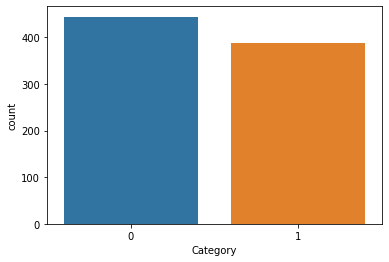

In [380]:
import seaborn as sns
sns.countplot('Category',data=dataset)

In [381]:
dataset.isnull().sum()

Description    0
Category       0
dtype: int64

# Cleaning the text

In [382]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [383]:
corpus = []
for i in range(0,831):   #we have 2217 chats
    chat = re.sub('[^a-zA-Z]'," ",dataset["Description"][i]) #sub can replace anything in a text with anything #replace punctuation
    chat = chat.lower()
    chat = chat.split()
    pe = PorterStemmer()
    all_stopword = stopwords.words('english')
    type(all_stopword)
    all_stopword.remove('not')
    chat = [pe.stem(word) for word in chat if not word in set(all_stopword)]
                ## for every word in chats we check if the word not in stopword if yes then
                ## using porterstemmer we apply stemming if no then we drop the word
    chat = " ".join(chat)
    corpus.append(chat)

In [384]:
corpus

['beauti',
 'promis never edit wikipedia get unblock',
 'wtf u fckin faggot ass mutha fcker u ju delt work gay school wtf ur promblem u gay child molest',
 'great glad manag work',
 'hi back last warn stop undo edit die',
 'stink suck hangingcurv blueboy even admin block ban us alway come back new account destroy wikipedia oh wait not admin anymor seem wonder happen hahaha',
 'crash rule rule wed crash creat delet januari total unencycloped wed crasher articl creat link rule extern site could take rule wed crash wp drv support',
 'wikipedia request arbitr husnock hello arbitr case comment open wikipedia request arbitr husnock pleas add evid may wish arbitr consid evid sub page wikipedia request arbitr husnock evid may also contribut case workshop sub page wikipedia request arbitr husnock workshop behalf arbitr committe eagl need help',
 'want speak manag wikipedia sir thoma hate say say world wikipedia see true color tommi ugli gay like',
 'oh wow thank defend guy delet everyth wrote w

# Creating a Bage of words model

In [385]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset["Category"]

In [386]:
len(X[0])  ## no. of col

1500

In [387]:
import pickle
pickle.dump(cv, open('cvx.pkl', 'wb'))

# Spliting the data

In [388]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((664, 1500), (167,))

In [389]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB().fit(X_train, y_train)
cls = MultinomialNB().fit(X_train, y_train)

In [390]:
cls.score(X_test,y_test)

0.7485029940119761

In [391]:
classifier.score(X_test,y_test)

0.562874251497006

In [392]:
y_pred = cls.predict(X_test)
type(y_test)

pandas.core.series.Series

In [393]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [394]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[76 19]
 [23 49]] 74.8502994011976


In [395]:
type(y_test)

pandas.core.series.Series

In [396]:
import pickle
# Save trained model to file
pickle.dump(cls, open("chatx.pkl", "wb"))

In [397]:
loaded_model = pickle.load(open("chatx.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7485029940119761

In [398]:
import pickle

loaded_model = pickle.load(open("chatx.pkl", "rb"))
cv = pickle.load(open("cvx.pkl","rb"))

def new_chat(new_chat):
    new_chat = new_chat
    new_chat = re.sub('[^a-zA-Z]', ' ', new_chat)
    new_chat = new_chat.lower()
    new_chat = new_chat.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_chat = [ps.stem(word) for word in new_chat if not word in set(all_stopwords)]
    new_chat = ' '.join(new_chat)
    new_corpus = [new_chat]
    new_X_test = cv.transform(new_corpus).toarray()
    print(new_X_test.shape)
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_chat = new_chat(str(input("Enter statement...")))
if new_chat[0]==1:
    print("Cyberbullying")
else :
    print("Not Cyberbullying")

(1, 1500)
Cyberbullying
